# Лабораторная работа №1 (Ким Д.В., группа БПМ-151)

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from sympy import *

%matplotlib inline

In [2]:
import time 
from tqdm import *

# Задача 2.1. 
Даны два уравнения  $f(x)=0$ и $g(x)=0$. Найти с точностью $\varepsilon=10^{-10}$ все корни уравнений, содержащиеся на отрезке $[a, b]$. Для решения  задачи использовать  метод бисекции.
<br>
$f(x) = x^4 - 7x^2 + 10$
<br>
$g(x) = x^4 - 4x^2 + 4$
<br>
$[a, b] = [0, 3]$

In [3]:
def bisection(fun, a0, b0, eps):
    pbarb = tqdm_notebook(total = 100)
    a = a0
    b = b0
    x = (a0 + b0)/2
    while (b - a)/2 > eps:
        pbarb.update(1)
        x = (a + b)/2
        if fun(a)*fun(x) < 0:
            b = x
        else:
            a = x
    x = (a + b)/2
    return x

In [4]:
f = lambda x : x**4 - 7*x**2 + 10

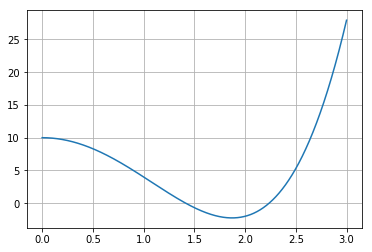

In [5]:
fx = np.arange(0, 3, 1e-3)
fy = f(fx)
plt.plot(fx, fy)
plt.grid(True)

Видим 2 корня. Один $-$ на отрезке $[1, 1.5]$, второй $-$ на отрезке $[2, 2.5]$

In [6]:
x1 = bisection(f, 1, 1.5, 1e-10)
x1

A Jupyter Widget

1.4142135623260401

In [7]:
f(x1)

3.992752795056731e-10

In [8]:
x2 = bisection(f, 2, 2.5, 1e-10)
x2

A Jupyter Widget

2.236067977442872

In [9]:
f(x2)

-7.636344889760949e-10

In [10]:
#Проверка встроенным методом
x = sym.Symbol('x')
sym.solveset(x**4 - 7*x**2 + 10, x, domain = sym.S.Reals)

{-sqrt(2), sqrt(2), -sqrt(5), sqrt(5)}

In [11]:
g = lambda x : x**4 - 4*x**2 + 4

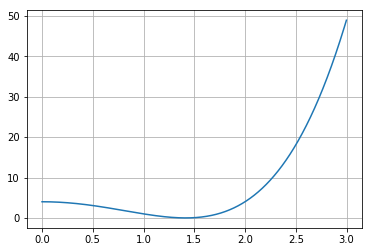

In [12]:
xx = np.arange(0, 3, 1e-3)
gy = g(xx)
plt.plot(xx, gy)
plt.grid(True)

На графике не видно, есть ли корни. Построим несколько графиков, сужая область поиска.

[1, 2, -1, 1]

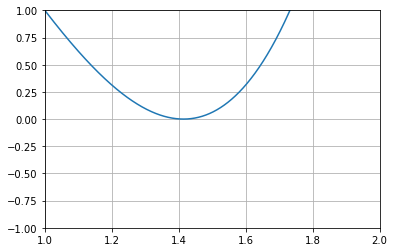

In [13]:
plt.plot(xx, gy)
plt.grid(True)
plt.axis([1, 2, -1, 1])

[1.38, 1.44, -0.025, 0.025]

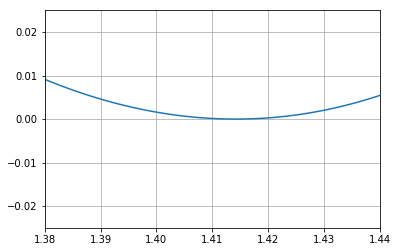

In [14]:
plt.plot(xx, gy)
plt.grid(True)
plt.axis([1.38, 1.44, -0.025, 0.025])

[1.4142135, 1.4142136, -1e-13, 1e-13]

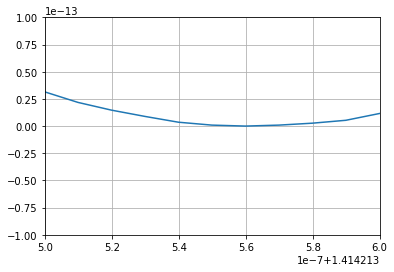

In [15]:
xx1 = np.arange(1.40, 1.42, 1e-8)
yy1 = g(xx1)
plt.plot(xx1, yy1)
plt.grid(True)
plt.axis([1.4142135, 1.4142136, -1e-13, 1e-13])

Проверим что на полученном отрезке функция с заданной точностью строго выше нуля. Вычислим значение функции на отрезке $[1.41421, 1.414213]$ с шагом $step=10^{-11}$(выше чем нужная точность) и посчитаем количество значений меньше нуля.

In [16]:
t = np.arange(1.41421, 1.414213, 1e-11)
t.size

300000

In [17]:
g(t).size

300000

In [18]:
np.where(g(t) < 0)

(array([], dtype=int64),)

# Задача 2.2. 
Найти положительный корень уравнения $f(x)=0$ с точностью $\varepsilon=10^{-6}$,  двумя  способами:
     1. Использовать метод бисекции. Предварительно определить отрезок локализации  [a,b].
     2. Использовать метод Ньютона. В качестве начального приближения для метода Ньютона взять  середину отрезка локализации из п. а).
Сравнить число итераций в п. 1, 2.
<br>
$f(x) = e^x + 1 - \sqrt{9-x^2}$

Найдем вначале корень $f(x)=0$ на отрезке $[0,3]$ с помощью метода бисекции.

In [19]:
def f1(x):
    return (np.e)**x + 1 - np.sqrt(9-x**2)

In [20]:
x = Symbol('x')
f1s = exp(x) + 1 - sqrt(9-x**2)

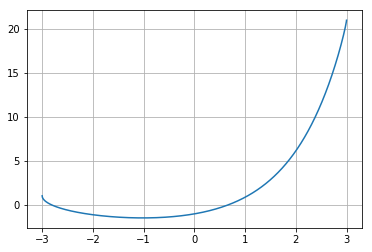

In [21]:
f1x = np.arange(-3, 3, 1e-3)
f1y = f1(f1x)
plt.plot(f1x, f1y)
plt.grid(True)

In [22]:
def newton(xstart, fun, eps):
    pbarn = tqdm_notebook(total = 100)
    x0 = xstart
    xi = x0 - fun.evalf(subs={x:x0})/diff(fun,x).evalf(subs={x:x0})
    while abs(xi - x0) > eps:
        pbarn.update(1)
        x0 = xi
        xi = x0 - fun.evalf(subs={x:x0})/diff(fun,x).evalf(subs={x:x0})
    return float(xi)

In [23]:
x_appr_n = newton(0, f1s, 1e-6)
x_appr_n

A Jupyter Widget

0.6561534966854013

In [24]:
x_appr_bis = bisection(f1, 0, 1, 1e-6)
x_appr_bis

A Jupyter Widget

0.656153678894043

[0.65615, 0.65616, -1e-05, 1e-05]

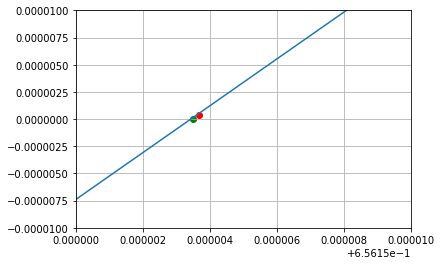

In [25]:
f1x = np.arange(-3, 3, 1e-3)
f1y = f1(f1x)
plt.plot(f1x, f1y)
plt.scatter(x_appr_n, f1(x_appr_n), c='g') # метод Ньютона
plt.scatter(x_appr_bis, f1(x_appr_bis), c='r') # бисекция 
plt.grid(True)
plt.axis([0.65615,0.65616,-0.00001,0.00001])

# Задача 2.3
Локализовать корни уравнения $f(x)=0$ и найти их с точностью $\varepsilon=10^{-5}$, используя метод простой итерации. К виду $x=\phi(x)$, удобному для итераций, уравнение $f(x)=0$ привести двумя способами
1. Преобразовать уравнение к виду  $x=x-\alpha\:f(x)$,    где $\alpha=\frac{2}{M+m}$, $0<m\leq f'(x)\leq M$, а $x$ принадлежит отрезку    локализации $[a, b]$.
2. Любым  другим  преобразованием  уравнения. Проверить достаточное условие сходимости метода. 
<br>

Использовать критерий окончания итерационного процесса вида $\Bigr|\:x^{(n)}-x^{(n-1)}\:\Bigr|<\frac{1-q}{q}\varepsilon$, где:
<br>в  п. 1)  $q=\frac{M-m}{M+m}$, 
<br>в п. 2)  $q = \max\limits_{x\in[a,b]}\Bigr|\:\phi'(x)\:\Bigr|$.
<br>
Cравнить число итераций и значения величины $q$  в  п. 1),  2).
<br>
$f(x)=\sin(x+2)-x^2+2x-1$

In [26]:
def f3(x_): 
    return np.sin(x_+2) - x_**2 + 2*x_ - 1

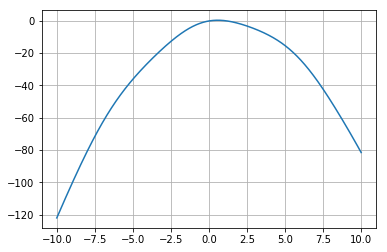

In [27]:
f3x = np.arange(-10, 10, 1e-3)
f3y = f3(f3x)
plt.plot(f3x, f3y)
plt.grid(True)

[-0.1, 1.2, -0.5, 0.5]

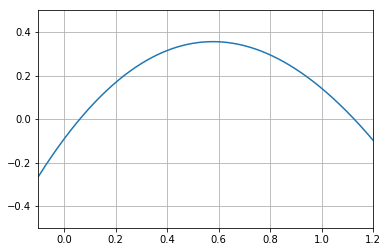

In [28]:
plt.plot(f3x, f3y)
plt.grid(True)
plt.axis([-0.1, 1.2, -0.5, 0.5])

In [29]:
def f3s(x): 
    return sin(x+2) - x**2 + 2*x - 1

Отрезки локализации: $[0,\:0.2]$, $[1,\:1.2]$

In [30]:
def fpit(fun, a, b, eps):
    pbarfp = tqdm_notebook(total = 100)
    m0 = sym.diff(fun(sym.Symbol('x')), sym.Symbol('x')).subs(sym.Symbol('x'), a).evalf()
    M0 = sym.diff(fun(sym.Symbol('x')), sym.Symbol('x')).subs(sym.Symbol('x'), b).evalf()
    m = abs(m0)
    M = abs(M0)
    if m > M:
        m, M = M, m
    q = (M - m)/(M + m)
    alpha = 2/(M0 + m0)
    print("q =", q)
    #Достаточное условие
    if q >= 1:
        print("q >= 1")
        return 0
    x0 = (a + b)/2
    x1 = x0 - alpha*fun(x0).evalf()
    while abs(x1 - x0) > (1 - q)/q*eps:
        pbarfp.update(1)
        x0 = x1
        x1 = x0 - alpha*fun(x0).evalf()
    return x1

In [36]:
x1_pit = fpit(f3s, 0, 0.2, 1e-5)

A Jupyter Widget

q = 0.220530498568303



In [37]:
x2_pit = fpit(f3s, 1, 1.2, 1e-5)

A Jupyter Widget

q = 0.170960287698064



In [33]:
def newton_plus(func, a, b, eps):
    pbarnp = tqdm_notebook(total = 100)
    phidxc = np.arange(a, b, 1e-3)
    phidyc = np.arange(a, b, 1e-3)
    l = np.shape(phidxc)[0]
    i = 0
    while i < l:
        phidyc[i] = (func(sym.Symbol('x'))*sym.diff(func(sym.Symbol('x')), sym.Symbol('x'), 2)/(sym.diff(func(sym.Symbol('x')), sym.Symbol('x'))**2)).subs(sym.Symbol('x'), phidxc[i]).evalf()
        i += 1
    q = np.max(phidyc)
    print("q =", q)
    #Достаточное условие
    if q >= 1:
        print("q >= 1")
        return 0
    xstart = (a + b)/2
    x0 = xstart
    x1 = (x0 - func(x0)/sym.diff(func(sym.Symbol('x')), sym.Symbol('x')).subs(sym.Symbol('x'), x0)).evalf()
    while abs(x1 - x0) > (1 - q)/q*eps:
        pbarnp.update(1)
        x0 = x1
        x1 = (x0 - func(x0)/sym.diff(func(sym.Symbol('x')), sym.Symbol('x')).subs(sym.Symbol('x'), x0)).evalf()
    return x1

In [38]:
x1_n = newton_plus(f3s, 0, 0.2, 1e-5)

A Jupyter Widget

q = 0.105190833905



In [39]:
x2_n = newton_plus(f3s, 1, 1.2, 1e-5)

A Jupyter Widget

q = 0.096619881356



In [41]:
np.abs(x1_pit-x1_n)

1.03268006167168e-6

In [42]:
np.abs(x2_pit-x2_n)

1.56618039337530e-6